In [47]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [48]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:

* age — возраст основного бенефициара;
* sex — пол страхового подрядчика;
* bmi — индекс массы тела (кг/м^2), в идеале — от 18.5 до 24.9;
* children — количество детей, охваченных медицинской страховкой;
* smoker — является ли человек курящим;
* region — жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);
* charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [49]:
#display(data.isnull().sum()) проверим пропуски
#display(data.dtypes) посмотрим тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Наши данные содержат несколько типов признаков:

* age, bmi, children — числовые признаки;
* sex, smoker — бинарные категориальные переменные (две категории);
* region — множественные категориальные переменные (несколько категорий);
* charges — числовой целевой признак.

Прежде чем приступать к этапу подготовки данных для модели, вы можете произвести небольшое исследование зависимостей в данных, например построить следующие графики и диаграммы:

* гистограммы/коробчатые диаграммы числовых признаков;
* столбчатые диаграммы медианных медицинских расходов в зависимости от категориальных признаков;
* диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных (обратите особенное внимание на зависимость медицинских расходов от признака курения).

In [50]:
df = data.copy()

In [51]:
types = df.dtypes
numb_features = list(types[types != 'object'].index)
numb_features

['age', 'bmi', 'children', 'charges']

In [52]:
'''n = len(numb_features)
fig, axes = plt.subplots(n, 2, figsize=(15, 20))

for i, feature in enumerate(numb_features):
    '''
#вернуться к диограммам когода нагоню

'n = len(numb_features)\nfig, axes = plt.subplots(n, 2, figsize=(15, 20))\n\nfor i, feature in enumerate(numb_features):\n    '

Кодировку будем совершать по следующему принципу:

* smoker — переведём в бинарные значения (0 — некурящий, 1 — курящий);
* sex — аналогично (0 — female, 1 — male);
* region — используем OneHot-кодирование (воспользуемся функцией get_dummies).

In [53]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [54]:
#Выделим факторы и целевой признак в отдельные таблицы:

features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

6.1 Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.

Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.

В качестве значения параметра random_state укажите число 42.

Чему равно количество наблюдений в тестовом наборе данных?

In [55]:
#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
display(f'Train shape: {X_train.shape}')
display(f'Test shape: {X_test.shape}')
display(f'Количество наблюдений в тьестовом наборе данных: {X_test.shape[0]}')

'Train shape: (1070, 9)'

'Test shape: (268, 9)'

'Количество наблюдений в тьестовом наборе данных: 268'

6.2 Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.

Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

In [56]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

display(f'w0: {round(lr.intercept_, 2)}') # свободный член (intercept)


"""
display('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))
print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_pred)*100))
print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))
print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)*100))
"""

'w0: -12390.8'

"\ndisplay('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))\nprint('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))\nprint('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_pred)*100))\nprint('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))\nprint('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))\nprint('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)*100))\n"

С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: R^2, MAE, MAPE. Не забудьте привести значение MAPE к процентам.

Значение R^2 округлите до трёх знаков после точки-разделителя, а значения MAE и MAPE — до целого числа.

Чему равны значения метрик на тренировочной и тестовой выборках?

In [57]:
display('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))
display('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
display('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)*100))

display('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))
display('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
display('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_pred)*100))

'Train R^2: 0.742'

'Train MAE: 4208'

'Train MAPE: 42'

'Test R^2: 0.784'

'Test MAE: 4181'

'Test MAPE: 47'

6.4 Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и предсказанием: y-y^ (y-y_pred) (без модуля).

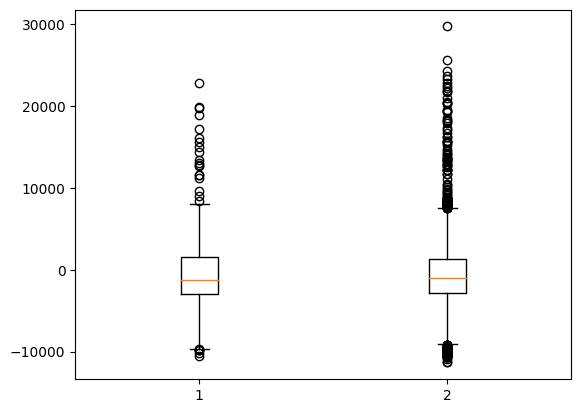

In [58]:
y_train_box = y_train - y_train_pred
y_test_box = y_test - y_test_pred

plt.boxplot([y_test_box, y_train_box])

plt.show()

**B** Разброс ошибок на тренировочной выборке больше, чем на тестовой.

**C** Медианная ошибка на тренировочной и тестовой выборках отрицательная (меньше 0).

6.5 Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.

Примечание. Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

Чему равно результирующее количество столбцов?

In [59]:
scaler = preprocessing.MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

display(f'Train shape: {X_train_scaled_poly.shape}')
display(f'Test shape: {X_test_scaled_poly.shape}')
display(f'Количество стобцов: {X_train_scaled_poly.shape[1]}')

'Train shape: (1070, 54)'

'Test shape: (268, 54)'

'Количество стобцов: 54'

6.6 Обучите модель линейной регрессии на полиномиальных признаках.

Чему равно значение метрики R^2 на тестовой выборке?

Значение R^2 округлите до трёх знаков после запятой.

In [60]:
"""lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)
y_train_pred = np.exp(lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(lr_poly.predict(X_test_scaled_poly))"""

#Инициализируем объект класса линейная регрессия с L2-регуляризацией 
ridge_lr_poly = linear_model.Ridge() # Почему пошли через Ridge?
#Обучаем модель предсказывать целевой признак
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_pred = ridge_lr_poly.predict(X_test_scaled_poly)

#0.866/0.867
display('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))

'Test R^2: 0.863'

Почему следующее решение прошлои? Всё равно идёт ошибка на большую размерность.

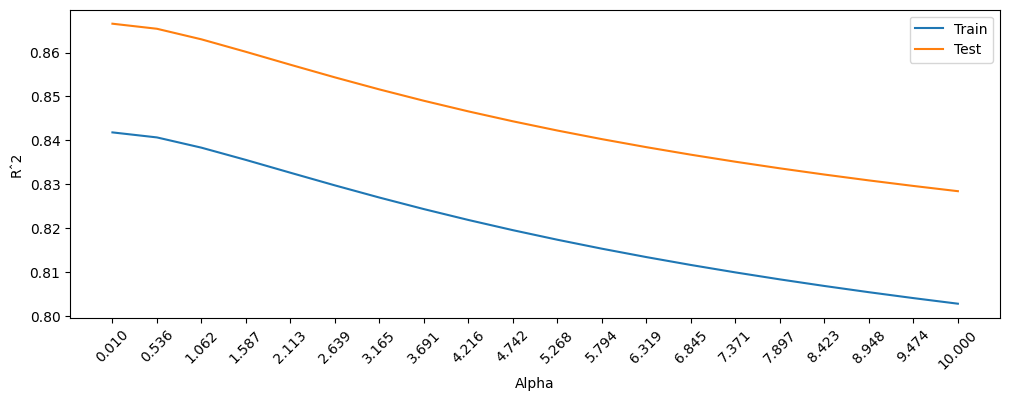

In [61]:
#Создаем список из 20 возможных значений от 0.001 до 10
alpha_list = np.linspace(0.01, 10, 20)
#Создаем пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаем объект класса линейная регрессия с L2-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    #Обучаем модель предсказывать логарифм целевого признака
    ridge_lr_poly.fit(X_train_scaled_poly, y_train)
    #Делаем предсказание для каждой из выборок
    #Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
    y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
    y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
    #Рассчитываем метрику для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('Rˆ2') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

In [62]:
#Создаем объект класса линейная регрессия с L2-регуляризацией
#Выставляем параметр alpha в подобранное выше значение
ridge_lr = linear_model.Ridge(alpha=0.01)
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = ridge_lr.predict(X_train_scaled_poly)
y_test_pred = ridge_lr.predict(X_test_scaled_poly)


display('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))

'Test R^2: 0.867'

Вместо np.exp используются rige_lr.predict

6.7 Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.

Какой вывод можно сделать?

In [63]:
display('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))
display('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
display('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)*100))

display('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))
display('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
display('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_pred)*100))

'Train R^2: 0.842'

'Train MAE: 2892'

'Train MAPE: 29'

'Test R^2: 0.867'

'Test MAE: 2730'

'Test MAPE: 30'

Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация.

6.8 Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.

Чему равны метрики R^2, MAE и MAPE на тестовой выборке?

Значение R^2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

In [64]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

display('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
display('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
display('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))

'Test R^2: 0.867'

'Test MAE: 2719'

'Test MAPE: 30'

6.9 Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.

Чему равны метрики R^2, MAE и MAPE на тестовой выборке?

Значение R^2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

In [65]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)

display('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
display('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
display('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))

'Test R^2: 0.863'

'Test MAE: 2861'

'Test MAPE: 31'

[Десять датасетов для практики работы с линейной регрессией](https://www.telusinternational.com/insights/ai-data/article/10-open-datasets-for-linear-regression)

[Базовые принципы машинного обучения на примере линейной регрессии](https://habr.com/ru/companies/ods/articles/322076/)

[Регрессионные модели в Python](https://nagornyy.me/it/regressionnye-modeli-v-python/)